In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [13]:
wallets_feats = pd.read_csv("../dataset/custom/features_fixed/wallets_features_with_users_agg.csv")[[
    "userId",
    "class",
]]
wallets_feats_ill = wallets_feats[wallets_feats["class"] == 1]

Text(0.5, 0.98, 'Number of unique wallet classes of user')

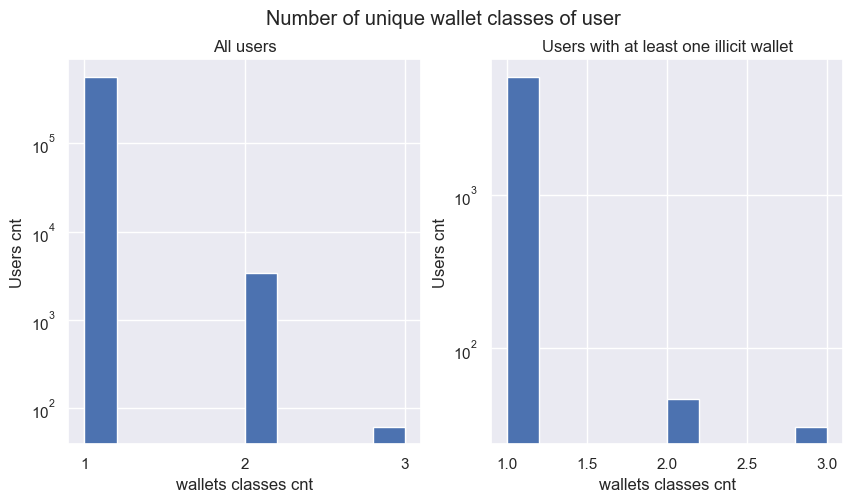

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

user_to_class_cnt = wallets_feats.groupby("userId")["class"].nunique().reset_index()
user_to_class_cnt["class"].hist(ax=ax[0])

tm = user_to_class_cnt[user_to_class_cnt["userId"].isin(wallets_feats_ill["userId"])]
mask = tm['class'] == 2
subset = tm[mask]

to_drop = subset.sample(frac=0.5, random_state=42)

tm = tm.drop(to_drop.index)

mask = tm['class'] == 3
subset = tm[mask]

to_drop = subset.sample(frac=0.5, random_state=42)

tm = tm.drop(to_drop.index)


tm["class"].hist(ax=ax[1])


ax[0].set_yscale("log")
ax[0].set_title("All users")

ax[1].set_yscale("log")
ax[1].set_title("Users with at least one illicit wallet")

ax[0].set_xlabel("wallets classes cnt")
ax[1].set_xlabel("wallets classes cnt")
ax[0].set_ylabel("Users cnt")
ax[1].set_ylabel("Users cnt")


ax[0].set_xticks([1,2,3])

plt.suptitle("Number of unique wallet classes of user")